### Import Libraries:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import sklearn

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv("sap_stock.txt")

In [4]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()

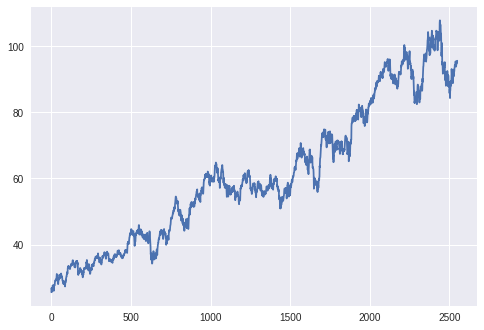

In [5]:
plt.plot(df["index"], df["Close"])
plt.show()

### Prepare the Dataset:

In [6]:
train, test = train_test_split(df, test_size=0.20)
train.shape, test.shape

((2040, 2), (510, 2))

In [7]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [8]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

### Create Model:

In [9]:
# create model:
model = LinearRegression()

# model train:
model.fit(X_train, y_train)

# Slope and Intercept:
print(f"The Slope is: {np.squeeze(model.coef_).item()} and intercept is: {model.intercept_}")

The Slope is: 0.02767354794703681 and intercept is: 25.643233101831704


### Model Evaluation

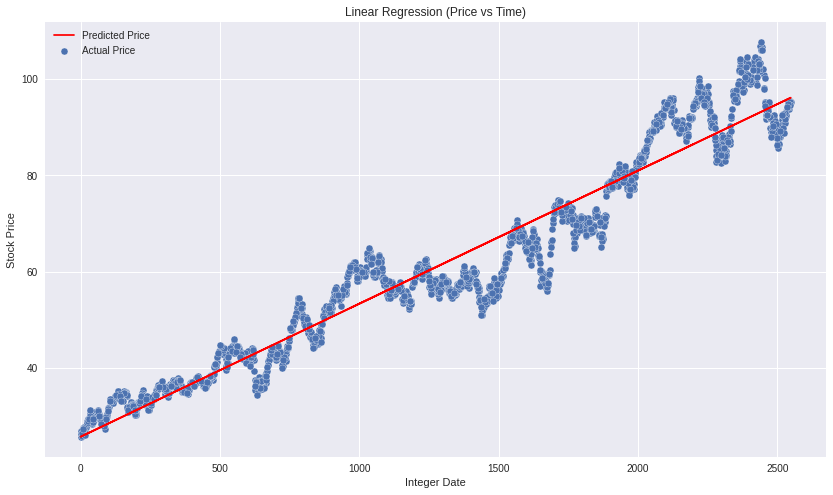

In [10]:
plt.figure(1, figsize=[14, 8])

plt.title('Linear Regression (Price vs Time)')

# plot points:
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')

# plot regression line:
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

### Prediction from our Model

In [11]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [12]:
y_pred = model.predict(X_test)

### Model Evaluation:

In [13]:
sklearn.metrics.r2_score(y_test, y_pred)

0.936323100141417

In [14]:
scores = {
    "r2": sklearn.metrics.r2_score(y_test, y_pred),
    "mae": sklearn.metrics.mean_absolute_error(y_test, y_pred),
    "mse": sklearn.metrics.mean_squared_error(y_test, y_pred),
    "explained_variance": sklearn.metrics.explained_variance_score(y_test, y_pred)
}

scores

{'r2': 0.936323100141417,
 'mae': 4.090709099121512,
 'mse': 27.549823381521627,
 'explained_variance': 0.9367191098150582}